# Project Title: MalariaNet - Deep Learning for Malaria Image Classification with TensorFlow

#### UMBC Data Science Master Degree Capstone - DATA606

**Guided by:**

Dr. Chaojie (Jay) Wang



### **Data:**
### **Data Source:** [Kaggle - Malaria Cell Images Dataset](https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria/data)
The dataset "Cell Images for Detecting Malaria" contains a collection of images representing blood smears of individuals infected with malaria and uninfected individuals.


### **Author Information:**
* **Name** - Srinivas Naidu Pasyavula

* **University** ID - QC61851
* **Github** - [Srinivas Naidu Pasyavula - Github](https://github.com/PasyavulaSrinivasNaidu/UMBC-DATA606-Capstone/)
* **LinkedIn** - [Srinivas Naidu Pasyavula - LinkedIn](https://www.linkedin.com/in/srinivas-naidu-pasyavula/)
* **Powerpoint Presentation** - [Project Presentation File]()
* **Youtube Video** - [Project Presentation Video]()


# **1. Importing all the Required Libraries**

In [1]:
import tensorflow as tf         # Models
import numpy as np              # Math Computations
import matplotlib.pyplot as plt # Plotting Bar Chart
import tensorflow_datasets as tfds # Tensorflow Datasets
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input # Model Creation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy
from google.colab import drive
from tensorflow.keras.models import Model

# **2. Data Preparation**

### **2.1 Loading Dataset using Tensorflow datasets**

In [2]:
# Loading the dataset from the Tensorflow
dataset, dataset_info = tfds.load('malaria', with_info = True, as_supervised = True, shuffle_files = True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteY55AOL/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


### **2.2 Data Exploration**

**NOTE:** This dataset structure indicates that you have a dataset of images along with their corresponding labels. Each image is represented as a 3D tensor with variable height and width and 3 color channels (RGB), while each label is represented as a scalar integer.

In [3]:
dataset
#This dataset structure indicates that, a dataset of images along with their corresponding labels. Each image is represented as a 3D tensor with variable height and width and 3 color channels (RGB), while each label is represented as a scalar integer.

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [4]:
#first 5 elements of the dataset and print each element. Each element of the dataset should be a tuple containing the image tensor and its corresponding label tensor
for data in dataset[0].take(5):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(115, 157, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [5]:
dataset_info # Complete Dataset Information

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmphgigw9ultfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


# **3. DATA Splitting**

**NOTE -**

**The Dataset is splitted into three parts Training, Validation and Testing (TRAIN/VAL/TEST)**

**Percentage of data allocated for training/validation and testing**

TRAIN_RATIO - 80 %  

VAL_RATIO   - 10 %

TEST_RATIO  - 10 %

In [6]:
# Creating Splits Function for splitting dataset into Train/Val/Test

def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
    # Calculate the size of the dataset
    DATASET_SIZE = len(dataset)

    # Train dataset: Take a portion of the dataset for training based on TRAIN_RATIO
    train_dataset = dataset.take(int(TRAIN_RATIO * DATASET_SIZE))

    # Validation dataset: Skip the samples already taken for training, then take a portion for validation based on VAL_RATIO
    val_test_dataset = dataset.skip(int(TRAIN_RATIO * DATASET_SIZE))
    val_dataset = val_test_dataset.take(int(VAL_RATIO * DATASET_SIZE))

    # Test dataset: Skip the samples already taken for training and validation, the rest is for testing
    test_dataset = val_test_dataset.skip(int(VAL_RATIO * DATASET_SIZE))

    # Return the split datasets for training, validation, and testing
    return train_dataset, val_dataset, test_dataset


In [7]:
# Defining the Ratios for TRAIN/VAL/TEST data

TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)

print(list(train_dataset.take(1).as_numpy_iterator()),
      list(val_dataset.take(1).as_numpy_iterator()),
      list(test_dataset.take(1).as_numpy_iterator()))


[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

# **4. Data Visualization**

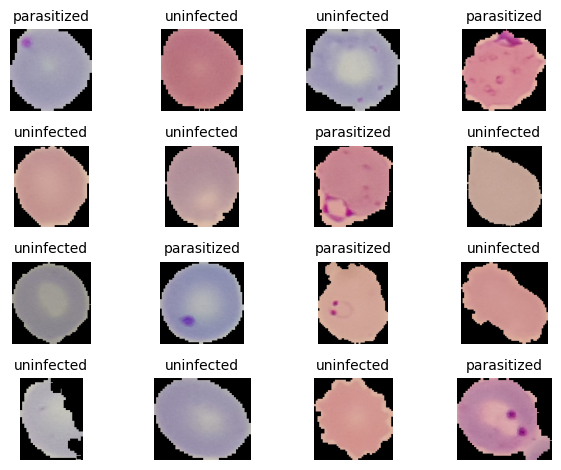

In [8]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4, i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label), fontsize=10)
  plt.axis('off')
plt.tight_layout()
plt.show()


In [9]:
dataset_info.features['label'].int2str(label) # 0,1

'parasitized'

# **5. Data Pre-Processing**

### **5.1 Resizing & Normalization**

There are two methods to do Standardisation (ex:car price prediction) when pixals values are around have common points else use Normalization(/255)

**NOTE -** This function is designed to preprocess images by resizing them to a fixed size (IM_SIZE x IM_SIZE) and rescaling the pixel values to the range [0, 1].

In [10]:
IM_SIZE = 224
def resizing_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [11]:
train_dataset = train_dataset.map(resizing_rescale)
val_dataset = val_dataset.map(resizing_rescale)
test_dataset = test_dataset.map(resizing_rescale)

print(train_dataset, val_dataset, test_dataset)

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))> <_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))> <_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [12]:
for image, label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


**NOTE -**

* Shuffling the dataset helps in randomizing the order of samples
during training, which can improve the effectiveness of the optimization algorithm.
* Batching the dataset combines consecutive elements into batches, which enables training the model on multiple samples simultaneously, leading to more efficient computation.
* Prefetching batches allows the training process to overlap the preprocessing of data and the execution of the model, reducing the time taken for training iterations.

In [13]:
BATCH_SIZE = 32  # Define the batch size for training

train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True)  # Shuffle the training dataset
train_dataset = train_dataset.batch(BATCH_SIZE)  # Batch the shuffled dataset
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)  # Prefetch batches to improve performance


In [14]:
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True)  # Shuffle the validation dataset
val_dataset = val_dataset.batch(BATCH_SIZE)  # Batch the shuffled validation dataset
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)  # Prefetch batches to improve performance

In [15]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [16]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [17]:
#test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# **6. Model Creation - Binary Classification**

## **Building ConvNets (Convolutional Neural Network) with TensorFlow**

### **6.1 Model Creation using - SEQUENTIAL API**

In [18]:
# LeNet Architecture Model

lenet_model = tf.keras.Sequential([
    InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),

    #Conv2D(filters = 6, kernel_size = 5, strides = 1, padding = 'valid', activation = 'sigmoid'), # For Sigmoid output lies between 0 and 1 # Original Sigmoid later changed to below relu for better model performance
    Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides=2),

    #Conv2D(filters = 16, kernel_size = 5, strides = 1, padding = 'valid', activation = 'sigmoid'), #original first sigmoid later changed to relu for better model performance everywhere in this block
    Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides=2),

    Flatten(), #Flatten converts to 1D output

    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10, activation = 'relu'),
    BatchNormalization(),

    Dense(1, activation = 'sigmoid'), # The Last Dense layer is two because this is a Binary Classification model which will have only two Outputs
])

lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

### **6.2 Model Creation using - FUNCTIONAL API**





In [19]:
# Feature Extractor Model

func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name = "Input Image")

x = Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = 2, strides=2)(x)

x = Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu')(x)
x = BatchNormalization()(x)
func_output = MaxPool2D(pool_size = 2, strides=2)(x)


feature_extractor_model = Model(func_input, func_output, name = "Feature_Extractor")
feature_extractor_model.summary()

Model: "Feature_Extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Bat  (None, 109, 109, 16)

In [20]:
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name = "Input Image")

x = feature_extractor_model(func_input)

x = Flatten()(x) #Flatten converts to 1D output

x = Dense(100, activation = 'relu')(x)
x = BatchNormalization()(x)

x = Dense(10, activation = 'relu')(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation = 'sigmoid')(x)

lenet_model_func = Model(func_input, func_output, name = "Lenet_Model")
lenet_model_func.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feature_Extractor (Functio  (None, 54, 54, 16)        1136      
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 46656)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_6 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                

# **7. Error Sanctioning - Binary Cross Entropy Loss**

In [21]:
# Test Sample Example for BCE
y_true = [0,]
y_pred = [0.8,]
bce = tf.keras.losses.BinaryCrossentropy()
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.6094375>

In [22]:
# Sequential API
lenet_model.compile(optimizer = Adam(learning_rate =0.01),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy')

In [23]:
# Functional API
lenet_model_func.compile(optimizer = Adam(learning_rate =0.01),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy')

# **8. Training ConvNets**

In [24]:
history = lenet_model.fit(train_dataset,  validation_data=val_dataset, epochs = 10, verbose =1)

Epoch 1/10
689/689 [==============================] - 68s 83ms/step - loss: 0.3593 - accuracy: 0.8451 - val_loss: 0.7810 - val_accuracy: 0.8225
Epoch 2/10
689/689 [==============================] - 41s 60ms/step - loss: 0.2151 - accuracy: 0.9237 - val_loss: 0.2114 - val_accuracy: 0.9296
Epoch 3/10
689/689 [==============================] - 50s 72ms/step - loss: 0.2004 - accuracy: 0.9293 - val_loss: 2.5969 - val_accuracy: 0.6338
Epoch 4/10
689/689 [==============================] - 41s 60ms/step - loss: 0.1816 - accuracy: 0.9367 - val_loss: 1.1152 - val_accuracy: 0.5107
Epoch 5/10
689/689 [==============================] - 52s 76ms/step - loss: 0.1619 - accuracy: 0.9431 - val_loss: 0.1479 - val_accuracy: 0.9521
Epoch 6/10
689/689 [==============================] - 41s 60ms/step - loss: 0.1726 - accuracy: 0.9389 - val_loss: 0.4661 - val_accuracy: 0.6574
Epoch 7/10
689/689 [==============================] - 42s 61ms/step - loss: 0.1585 - accuracy: 0.9467 - val_loss: 1.1610 - val_accuracy:

In [25]:
# history = lenet_model.fit(train_dataset, epochs = 10, verbose =1) # removing Validation for debugging faster

# **9. Plotting Accuracy**

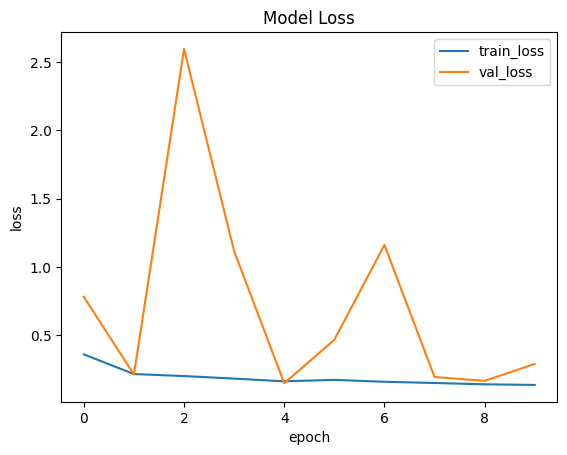

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

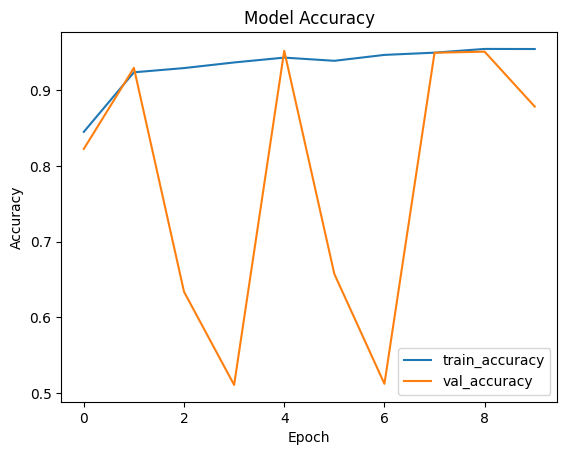

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

# **10. Model Evaluating and Testing**

### **10.1 Model Evaluating**

In [28]:
test_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [29]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [30]:
test_dataset = test_dataset.batch(1)#(TensorSpec(shape=(224, 224, 3) for test_dataset #TensorSpec(shape=(None, 224, 224, 3) for train dataset (None is extra)

In [31]:
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [32]:
lenet_model.evaluate(test_dataset)

2757/2757 [==============================] - 24s 4ms/step - loss: 0.3074 - accuracy: 0.8705


[0.3074297606945038, 0.8705114126205444]

## **10.2 Model Predictions**

In [33]:
# lenet_model.predict(test_dataset.take(1))[0][0]
lenet_model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 12s 12s/step


0.89835507

In [34]:
def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')
# Parasitized = 0 and UnInfected = 1

In [35]:
parasite_or_not(lenet_model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 10s 10s/step


'P'

1/1 [==============================] - 0s 27ms/step


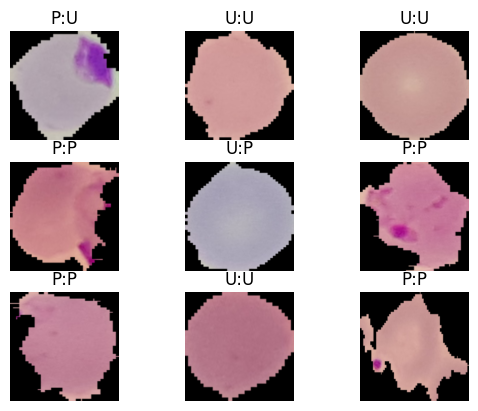

In [36]:
# Testing different Elements
# replace a with test_data

for i, (image,label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(lenet_model.predict(image)[0][0])))
  plt.axis('off')

# **11. Saving to and Loading from Google Drive**

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **11.1 Save the Whole Model**

In [39]:
# Save the model
lenet_model.save('lenet_model_whole')
# Save the model in HDF5 format
lenet_model.save('lenet_model_whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
# Download the saved model to your local machine
from google.colab import files
files.download("lenet_model_whole")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
# Save the model to Google Drive
lenet_model.save("/content/drive/My Drive/lenet_model_whole")

## **11.2 Save only Weights**

In [42]:
lenet_model.save_weights("lenet_model_weights")

## **11.3 Save only architecture, to_json**

In [43]:
json_string = lenet_model.to_json()

In [44]:
# Saving Model
with open("load_json_string", "w") as f:
  f.write(json_string)

## **12. Loading Model**

In [45]:
# Loading Whole Model
load_lenet_model = tf.keras.models.load_model("lenet_model_whole")

In [ ]:
# Loading Weights Model
load_lenet_model_weights = lenet_model_weights.load_weights("lenet_model_weights")

In [ ]:
# Loading Json  Model Architecture
with open("load_json_string", "r") as f:
  load_json_string = f.read()

new_model = keras.models.model_from_json(load_json_string)
print(new_model.summary())

# **Next Steps -**



1.   Functional API (Additional Model)
2.   Hyperparameters Tuning
3.   Selecting Best Model by Comparision
4.   Deploying Model to Cloud and Testing and Validating

